In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import collections
import numpy as np
import re
from nltk.corpus import stopwords
import copy
import torch

In [2]:
if torch.cuda.is_available():    
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

cuda


In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


ENGLISH DATASET ANALYSIS

In [5]:
ENGLISH_HOF = []
ENGLISH_NOT = []

In [6]:
english_df_2019 = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2019/english_dataset/english_dataset_2019.csv', error_bad_lines=False)
english_df_2019 = english_df_2019.drop(columns=['task_2', 'task_3'])
print(english_df_2019.shape)
labels = collections.Counter(english_df_2019['task_1'])
ENGLISH_HOF.append(labels['HOF'])
ENGLISH_NOT.append(labels['NOT'])
print(labels)
print(english_df_2019.columns)
english_df_2019.head()

(5852, 3)
Counter({'NOT': 3591, 'HOF': 2261})
Index(['text_id', 'text', 'task_1'], dtype='object')


,text_id,text,task_1
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NOT
1,hasoc_en_2,@politico No. We should remember very clearly ...,HOF
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NOT
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NOT
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NOT


In [7]:
english_df_2020 = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2020/english_dataset/english_dataset_2020.csv', error_bad_lines=False)
english_df_2020 = english_df_2020.drop(columns=['task2'])
print(english_df_2020.shape)
print(english_df_2020.columns)
labels = collections.Counter(english_df_2020['task1'])
ENGLISH_HOF.append(labels['HOF'])
ENGLISH_NOT.append(labels['NOT'])
print(labels)
english_df_2020.head()

(3708, 4)
Index(['tweet_id', 'text', 'task1', 'ID'], dtype='object')
Counter({'HOF': 1856, 'NOT': 1852})


,tweet_id,text,task1,ID
0,1.123757e+18,hate wen females hit ah nigga with tht bro ___...,HOF,hasoc_2020_en_2574
1,1.123733e+18,RT @airjunebug: When you're from the Bay but y...,HOF,hasoc_2020_en_3627
2,1.123734e+18,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,NOT,hasoc_2020_en_3108
3,1.126951e+18,RT @SheLoveTimothy: He ainÕt on drugs he just ...,HOF,hasoc_2020_en_3986
4,1.126864e+18,RT @TavianJordan: Summer Ô19 IÕm coming for yo...,NOT,hasoc_2020_en_5152


In [8]:
english_df_2019t = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2019/english_dataset/english_dataset_test_2019.csv', error_bad_lines=False)
print(english_df_2019t.columns)
english_df_2019t = english_df_2019t.drop(columns=['task_2', 'task_3'])
print(english_df_2019t.shape)
labels = collections.Counter(english_df_2019t['task_1'])
ENGLISH_HOF.append(labels['HOF'])
ENGLISH_NOT.append(labels['NOT'])
print(labels)
english_df_2019t.head()

Index(['text_id', 'text', 'task_1', 'task_2', 'task_3'], dtype='object')
(1153, 3)
Counter({'NOT': 865, 'HOF': 288})


,text_id,text,task_1
0,hasoc_en_902,West Bengal Doctor Crisis: Protesting doctors ...,NOT
1,hasoc_en_416,68.5 million people have been forced to leave ...,NOT
2,hasoc_en_207,"You came, you saw .... we will look after the ...",NOT
3,hasoc_en_595,We'll get Brexit delivered by October 31st. ...,NOT
4,hasoc_en_568,Fuck you. Go back to the dark ages you cow @IB...,HOF


In [9]:
english_df_2020t = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2020/english_dataset/english_dataset_test_2020.csv', error_bad_lines=False)
english_df_2020t = english_df_2020t.drop(columns=['task2'])
print(english_df_2020t.shape)
print(english_df_2020t.columns)
labels = collections.Counter(english_df_2020t['task1'])
ENGLISH_HOF.append(labels['HOF'])
ENGLISH_NOT.append(labels['NOT'])
print(labels)
english_df_2020t.head()

(814, 4)
Index(['tweet_id', 'text', 'task1', 'ID'], dtype='object')
Counter({'HOF': 423, 'NOT': 391})


,tweet_id,text,task1,ID
0,1130081762154090497,RT @delmiyaa: Samini resetting the show and mo...,NOT,hasoc_2020_en_2713
1,1130048316807491584,@Swxnsea how do you know that he’s left?,HOF,hasoc_2020_en_3874
2,1123657766143504386,Tried to get Divock Origi on a free seeing as ...,NOT,hasoc_2020_en_281
3,1126782963042013186,RT @nutclusteruwu: that....is yalls stupid whi...,HOF,hasoc_2020_en_2026
4,1130159113529434113,&amp; IT DID. But a bitch got big girls things...,HOF,hasoc_2020_en_4023


([<matplotlib.axis.XTick at 0x7ff1c4132f90>,
 [Text(0, 0, 'train 2019'),
  Text(0, 0, 'train 2020'),
  Text(0, 0, 'test 2019'),
  Text(0, 0, 'test 2020')])

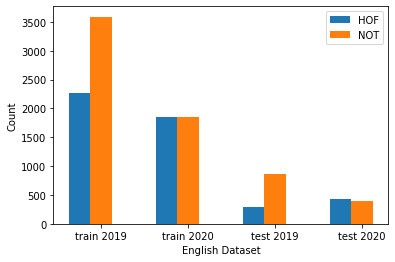

In [10]:
barWidth = 0.25
br1 = np.arange(len(ENGLISH_HOF))
br2 = [x + barWidth for x in br1]
plt.bar(br1, ENGLISH_HOF, width=barWidth, label='HOF')
plt.bar(br2, ENGLISH_NOT, width=barWidth, label='NOT')
plt.legend()
plt.xlabel('English Dataset')
plt.ylabel('Count')
plt.xticks([r + barWidth for r in range(len(br1))],
        ['train 2019', 'train 2020', 'test 2019', 'test 2020'])

SPANISH DATASET ANALYSIS

In [11]:
SPANISH_HOF = []
SPANISH_NOT = []

In [12]:
spanish_df_2019 = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/spanish_dataset/spanish_dataset.csv', error_bad_lines=False)
# spanish_df_2019 = spanish_df_2019.drop(columns=['task_2'])
print(spanish_df_2019.shape)
labels = collections.Counter(spanish_df_2019['HS'])
SPANISH_HOF.append(labels[1])
SPANISH_NOT.append(labels[0])
print(labels)
print(spanish_df_2019.columns)
spanish_df_2019.head()

(4450, 3)
Counter({0: 2617, 1: 1833})
Index(['id', 'text', 'HS'], dtype='object')


,id,text,HS
0,20001,Easyjet quiere duplicar el número de mujeres p...,1
1,20002,El gobierno debe crear un control estricto de ...,1
2,20003,Yo veo a mujeres destruidas por acoso laboral ...,0
3,20004,"— Yo soy respetuoso con los demás, sólamente l...",0
4,20007,Antonio Caballero y como ser de mal gusto e ig...,0


In [13]:
spanish_df_2019t = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/spanish_dataset/spanish_dataset_test.csv', error_bad_lines=False)
# spanish_df_2019 = spanish_df_2019.drop(columns=['task_2'])
print(spanish_df_2019t.shape)
labels = collections.Counter(spanish_df_2019t['task_1'])
SPANISH_HOF.append(labels[1])
SPANISH_NOT.append(labels[0])
print(labels)
print(spanish_df_2019t.columns)
spanish_df_2019t.head()

(500, 3)
Counter({0: 278, 1: 222})
Index(['id', 'text', 'task_1'], dtype='object')


,id,text,task_1
0,20005,Me estoy comiendo la picada árabe más rica de ...,0
1,20006,@Haryachyzaychyk Callate zorra y mama duro! 😍,1
2,20011,Acabo de escuchar a Casado diciendo que hay DE...,0
3,20019,Y NADIE SE HA PREGUNTADO LO QUE LE VA A COSTAR...,1
4,20033,"@Fed_Durand Callate come sobra, más zorra son ...",1


([<matplotlib.axis.XTick at 0x7ff1c3ad3a50>,
 [Text(0, 0, 'train 2018'), Text(0, 0, 'test 2018')])

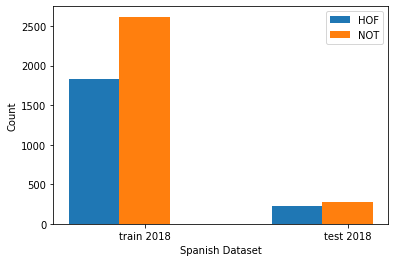

In [14]:
barWidth = 0.25
br1 = np.arange(len(SPANISH_HOF))
br2 = [x + barWidth for x in br1]
plt.bar(br1, SPANISH_HOF, width=barWidth, label='HOF')
plt.bar(br2, SPANISH_NOT, width=barWidth, label='NOT')
plt.legend()
plt.xlabel('Spanish Dataset')
plt.ylabel('Count')
plt.xticks([r + barWidth for r in range(len(br1))],
        ['train 2018', 'test 2018'])

GERMAN DATASET ANALYSIS

In [15]:
GERMAN_HOF = []
GERMAN_NOT = []

In [16]:
german_df_2019 = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2019/german_dataset/german_dataset_2019.csv', error_bad_lines=False)
german_df_2019 = german_df_2019.drop(columns=['task_2'])
print(german_df_2019.shape)
labels = collections.Counter(german_df_2019['task_1'])
GERMAN_HOF.append(labels['HOF'])
GERMAN_NOT.append(labels['NOT'])
print(labels)
print(german_df_2019.columns)
german_df_2019.head()

(3819, 3)
Counter({'NOT': 3412, 'HOF': 407})
Index(['text_id', 'text', 'task_1'], dtype='object')


,text_id,text,task_1
0,hasoc_de_1,Frank Rennicke – Ich bin stolz https://t.co/Cm...,NOT
1,hasoc_de_2,ANSEHEN.....und danach bitte TEILEN...TEILEN.....,NOT
2,hasoc_de_3,#Koeln Mohamed erkennt kein deutsches Recht so...,NOT
3,hasoc_de_4,#SaudiArabien ist eine brutale islamische Dikt...,NOT
4,hasoc_de_5,Bundespolizei #München hat im 1. Quartal 2019 ...,NOT


In [17]:
german_df_2020 = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2020/german_dataset/german_dataset_2020.csv', error_bad_lines=False)
print(german_df_2020.columns)
german_df_2020 = german_df_2020.drop(columns=['task2'])
print(german_df_2020.shape)
labels = collections.Counter(german_df_2020['task1'])
GERMAN_HOF.append(labels['HOF'])
GERMAN_NOT.append(labels['NOT'])
print(labels)
german_df_2020.head()

Index(['tweet_id', 'text', 'task1', 'task2', 'ID'], dtype='object')
(2373, 4)
Counter({'NOT': 1700, 'HOF': 673})


,tweet_id,text,task1,ID
0,1.133389e+18,Deutsche rothaarige porno reife deutsche fraue...,NOT,hasoc_2020_de_2684
1,1.127135e+18,RT @NDRinfo: Die deutsche Klimaaktivistin Luis...,NOT,hasoc_2020_de_1042
2,1.128897e+18,@ruhrbahn jeden Morgen eine neue „Fahrzeugstör...,NOT,hasoc_2020_de_774
3,1.123577e+18,@Junge_Freiheit Die Inkas hatten sich schon dä...,NOT,hasoc_2020_de_559
4,1.128744e+18,RT @technosteron: leute die 'boar' schreiben l...,HOF,hasoc_2020_de_1969


In [18]:
german_df_2019t = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2020/german_dataset/german_dataset_test_2020.csv', error_bad_lines=False)
print(german_df_2019t.columns)
german_df_2019t = german_df_2019t.drop(columns=['task2'])
print(german_df_2019t.shape)
labels = collections.Counter(german_df_2019t['task1'])
GERMAN_HOF.append(labels['HOF'])
GERMAN_NOT.append(labels['NOT'])
print(labels)
german_df_2019t.head()

Index(['tweet_id', 'text', 'task1', 'task2', 'ID'], dtype='object')
(526, 4)
Counter({'NOT': 392, 'HOF': 134})


,tweet_id,text,task1,ID
0,1129095874242650112,@derCarsti Boykottieren hört sich besser an. 💙💙,NOT,hasoc_2020_de_1053
1,1129004308396236800,"RT @ibikus31: Es wird spekuliert, ob Merkel ei...",NOT,hasoc_2020_de_671
2,1130896929355907080,Hat #Hitler wirklich den Krieg in der Wüste ve...,NOT,hasoc_2020_de_2977
3,1132251534329307136,RT @Beatrix_vStorch: #May tritt in UK unter Tr...,NOT,hasoc_2020_de_1746
4,1124941869115498496,@justmeDoro Eher nicht. Das Gänse hauen wieder...,NOT,hasoc_2020_de_2416


In [19]:
german_df_2020t = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2020/english_dataset/english_dataset_test_2020.csv', error_bad_lines=False)
german_df_2020t = german_df_2020t.drop(columns=['task2'])
print(german_df_2020t.shape)
print(german_df_2020t.columns)
labels = collections.Counter(german_df_2020t['task1'])
GERMAN_HOF.append(labels['HOF'])
GERMAN_NOT.append(labels['NOT'])
print(labels)
german_df_2020t.head()

(814, 4)
Index(['tweet_id', 'text', 'task1', 'ID'], dtype='object')
Counter({'HOF': 423, 'NOT': 391})


,tweet_id,text,task1,ID
0,1130081762154090497,RT @delmiyaa: Samini resetting the show and mo...,NOT,hasoc_2020_en_2713
1,1130048316807491584,@Swxnsea how do you know that he’s left?,HOF,hasoc_2020_en_3874
2,1123657766143504386,Tried to get Divock Origi on a free seeing as ...,NOT,hasoc_2020_en_281
3,1126782963042013186,RT @nutclusteruwu: that....is yalls stupid whi...,HOF,hasoc_2020_en_2026
4,1130159113529434113,&amp; IT DID. But a bitch got big girls things...,HOF,hasoc_2020_en_4023


([<matplotlib.axis.XTick at 0x7ff1c3a3f9d0>,
 [Text(0, 0, 'train 2019'),
  Text(0, 0, 'train 2020'),
  Text(0, 0, 'test 2019'),
  Text(0, 0, 'test 2020')])

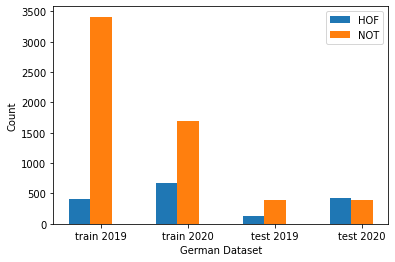

In [20]:
barWidth = 0.25
br1 = np.arange(len(GERMAN_HOF))
br2 = [x + barWidth for x in br1]
plt.bar(br1, GERMAN_HOF, width=barWidth, label='HOF')
plt.bar(br2, GERMAN_NOT, width=barWidth, label='NOT')
plt.legend()
plt.xlabel('German Dataset')
plt.ylabel('Count')
plt.xticks([r + barWidth for r in range(len(br1))],
        ['train 2019', 'train 2020', 'test 2019', 'test 2020'])

HINDI DATASET ANALYSIS

In [21]:
HINDI_HOF = []
HINDI_NOT = []

In [22]:
hindi_df_2019 = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2019/hindi_dataset/hindi_dataset_2019.csv', error_bad_lines=False)
hindi_df_2019 = hindi_df_2019.drop(columns=['task_2', 'task_3'])
print(hindi_df_2019.shape)
labels = collections.Counter(hindi_df_2019['task_1'])
HINDI_HOF.append(labels['HOF'])
HINDI_NOT.append(labels['NOT'])
print(labels)
print(hindi_df_2019.columns)
hindi_df_2019.head()

(4665, 3)
Counter({'HOF': 2469, 'NOT': 2196})
Index(['text_id', 'text', 'task_1'], dtype='object')


,text_id,text,task_1
0,hasoc_hi_5556,"बांग्लादेश की शानदार वापसी, भारत को 314 रन पर ...",NOT
1,hasoc_hi_5648,सब रंडी नाच देखने मे व्यस्त जैसे ही कोई #शांती...,HOF
2,hasoc_hi_164,तुम जैसे हरामियों के लिए बस जूतों की कमी है शु...,HOF
3,hasoc_hi_3530,"बीजेपी MLA आकाश विजयवर्गीय जेल से रिहा, जमानत ...",NOT
4,hasoc_hi_5206,चमकी बुखार: विधानसभा परिसर में आरजेडी का प्रदर...,NOT


In [23]:
hindi_df_2020 = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2020/hindi_dataset/hindi_dataset_2020.csv', error_bad_lines=False)
print(hindi_df_2020.columns)
hindi_df_2020 = hindi_df_2020.drop(columns=['task2'])
print(hindi_df_2020.shape)
labels = collections.Counter(hindi_df_2020['task1'])
HINDI_HOF.append(labels['HOF'])
HINDI_NOT.append(labels['NOT'])
print(labels)
hindi_df_2020.head()

Index(['tweet_id', 'text', 'task1', 'task2', 'ID'], dtype='object')
(2963, 4)
Counter({'NOT': 2116, 'HOF': 847})


,tweet_id,text,task1,ID
0,1.127755e+18,1 आदमीं को मारने पर गोडसे आतंकी हो सके है तो\n...,HOF,hasoc_2020_hi_2250
1,1.123579e+18,"RT @Vishesh4: @jawaharyadavbjp जवाहर यादव, अगर...",NOT,hasoc_2020_hi_381
2,1.127750e+18,RT @FunKeyBaat: #भगवा वस्त्र पहन कर मतदान नही ...,HOF,hasoc_2020_hi_1510
3,1.127661e+18,Yey nina khothani labafazi benu phambili Finis...,HOF,hasoc_2020_hi_1010
4,1.123487e+18,RT @Rajeshbhanjan2: जब भी कोई सिकुलर कोंग्रेसी...,HOF,hasoc_2020_hi_331


In [24]:
hindi_df_2019t = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2020/hindi_dataset/hindi_dataset_test_2020.csv', error_bad_lines=False)
print(hindi_df_2019t.columns)
hindi_df_2019t = hindi_df_2019t.drop(columns=['task2'])
print(hindi_df_2019t.shape)
labels = collections.Counter(hindi_df_2019t['task1'])
HINDI_HOF.append(labels['HOF'])
HINDI_NOT.append(labels['NOT'])
print(labels)
hindi_df_2019t.head()

Index(['tweet_id', 'text', 'task1', 'task2', 'ID'], dtype='object')
(663, 4)
Counter({'NOT': 466, 'HOF': 197})


,tweet_id,text,task1,ID
0,1127781647783301120,@Kinjal_Dubey_ इसके लिए तैयारी हो रखी है\nआपको...,HOF,hasoc_2020_hi_1938
1,1127492853171535872,RT @pratimamishra04: दिल्ली के मुख्यमंत्री @Ar...,NOT,hasoc_2020_hi_1201
2,1123638375896903681,"RT @nishantdabre2: आज एक तरफ खुशी है, तो एक तर...",NOT,hasoc_2020_hi_1628
3,1127496460310683648,@BJP4India @HardeepSPuri जिस कुनबे के लोग :-\n...,NOT,hasoc_2020_hi_3257
4,1127667277535399937,@manakgupta बादल....😂😂😂,NOT,hasoc_2020_hi_4133


In [25]:
hindi_df_2020t = pd.read_csv('/content/gdrive/My Drive/NLP Project/data/2020/hindi_dataset/hindi_dataset_test_2020.csv', error_bad_lines=False)
hindi_df_2020t = hindi_df_2020t.drop(columns=['task2'])
print(hindi_df_2020t.shape)
print(hindi_df_2020t.columns)
labels = collections.Counter(hindi_df_2020t['task1'])
HINDI_HOF.append(labels['HOF'])
HINDI_NOT.append(labels['NOT'])
print(labels)
hindi_df_2020t.head()

(663, 4)
Index(['tweet_id', 'text', 'task1', 'ID'], dtype='object')
Counter({'NOT': 466, 'HOF': 197})


,tweet_id,text,task1,ID
0,1127781647783301120,@Kinjal_Dubey_ इसके लिए तैयारी हो रखी है\nआपको...,HOF,hasoc_2020_hi_1938
1,1127492853171535872,RT @pratimamishra04: दिल्ली के मुख्यमंत्री @Ar...,NOT,hasoc_2020_hi_1201
2,1123638375896903681,"RT @nishantdabre2: आज एक तरफ खुशी है, तो एक तर...",NOT,hasoc_2020_hi_1628
3,1127496460310683648,@BJP4India @HardeepSPuri जिस कुनबे के लोग :-\n...,NOT,hasoc_2020_hi_3257
4,1127667277535399937,@manakgupta बादल....😂😂😂,NOT,hasoc_2020_hi_4133


([<matplotlib.axis.XTick at 0x7ff1c36b61d0>,
 [Text(0, 0, 'train 2019'),
  Text(0, 0, 'train 2020'),
  Text(0, 0, 'test 2019'),
  Text(0, 0, 'test 2020')])

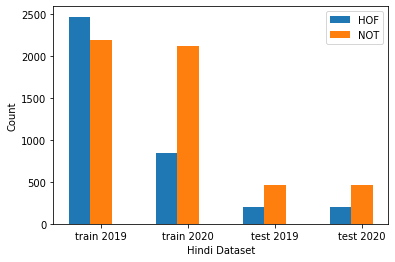

In [26]:
barWidth = 0.25
br1 = np.arange(len(HINDI_HOF))
br2 = [x + barWidth for x in br1]
plt.bar(br1, HINDI_HOF, width=barWidth, label='HOF')
plt.bar(br2, HINDI_NOT, width=barWidth, label='NOT')
plt.legend()
plt.xlabel('Hindi Dataset')
plt.ylabel('Count')
plt.xticks([r + barWidth for r in range(len(br1))],
        ['train 2019', 'train 2020', 'test 2019', 'test 2020'])

COLLECTIVE DATASET ANALYSIS

In [153]:
total_hof = [np.sum(ENGLISH_HOF), np.sum(GERMAN_HOF), np.sum(SPANISH_HOF), np.sum(HINDI_HOF)]
total_not = [np.sum(ENGLISH_NOT), np.sum(GERMAN_NOT), np.sum(SPANISH_NOT), np.sum(HINDI_NOT)]

Text(0.5, 1.0, 'Hate Tweets')

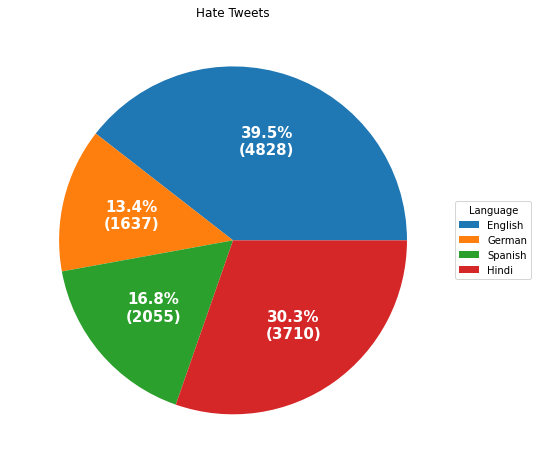

In [154]:
labels = ['English', 'German', 'Spanish', 'Hindi']
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(total_hof, autopct=lambda pct: func(pct, total_hof),textprops=dict(color="w"), labels=labels)
ax.legend(wedges, labels,
          title="Language",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Hate Tweets")

Text(0.5, 1.0, 'Not Hate Tweets')

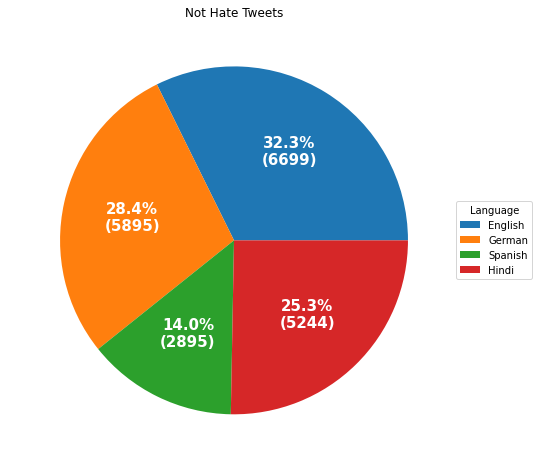

In [155]:
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(total_not, autopct=lambda pct: func(pct, total_not),textprops=dict(color="w"), labels=labels)
ax.legend(wedges, labels,
          title="Language",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Not Hate Tweets")

Text(0.5, 1.0, 'Language Distribution of Datasets')

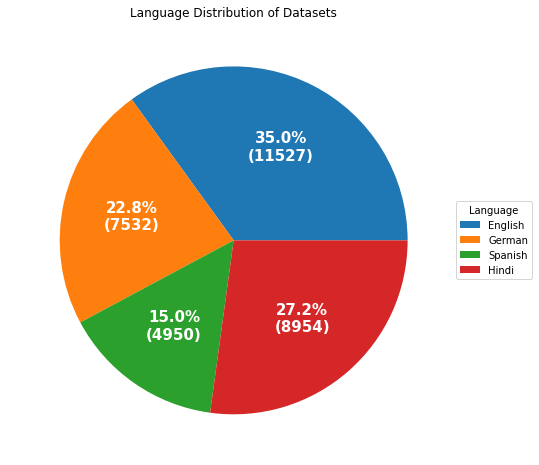

In [156]:
data = [a + b for a, b in zip(total_hof, total_not)]
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),textprops=dict(color="w"), labels=labels)
ax.legend(wedges, labels,
          title="Language",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=15, weight="bold")
ax.set_title("Language Distribution of Datasets")

CLEANING OF DATA - Remove STOP WORDS

In [31]:
def modify_tweets(data):
  # print(data.columns)
  modified_tweets = []
  for text in data:

      #To remove @AnyName from the tweets
      text=re.sub(r"@[a-zA-z0-9]*\s+","",text) 
      text=re.sub(r"@[a-zA-z0-9]*:","",text)
      text=re.sub(r"@[a-zA-z0-9]*","",text)  
      text=re.sub(r"@[a-zA-z0-9]*$","",text)
      
      #To remove links
      text=re.sub(r"^https://t.co/[a-zA-Z0-9]*\s+"," ",text)    
      text=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s+"," ",text)  
      text=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ",text)    
      
      #To Convert all the tweets to low.
      # text=text.lower() 
      
      #To remove the shorthands
      text=re.sub(r"that's","that is ",text)
      text=re.sub(r"there's","there is ",text)
      text=re.sub(r"what's","what is ",text)
      text=re.sub(r"where's","where is ",text)
      text=re.sub(r"it's","it is ",text)
      text=re.sub(r"who's","who is ",text)
      text=re.sub(r"i'm","i am ",text)
      text=re.sub(r"she's","she is ",text)
      text=re.sub(r"he's","he is ",text)
      text=re.sub(r"they're","they are ",text)
      text=re.sub(r"who're","who are ",text)
      text=re.sub(r"ain't","am not ",text)
      text=re.sub(r"wouldn't","would not ",text)
      text=re.sub(r"shouldn't","should not ",text)
      text=re.sub(r"can't","cannot ",text)
      text=re.sub(r"couldn't","could not ",text)
      text=re.sub(r"won't","will not ",text)
      
      #To remove the single character
      text=re.sub(r"\s+[a-z]\s+"," ",text)
      text=re.sub(r"\s+[a-z]$"," ",text)
      text=re.sub(r"^[a-z]\s+"," ",text)
      
      #To remove non-word character
      text=re.sub(r"^[「人間はいわば感情に左右される生き物である」]*\s+"," ",text)
      text=re.sub(r"\s+[「人間はいわば感情に左右される生き物である」]*\s+"," ",text)
      text=re.sub(r"\s+[「人間はいわば感情に左右される生き物である」]*$"," ",text)
      text=re.sub(r"[!@$,%^&*\"><]*","",text)
      text=re.sub(r"\."," ",text)
      
      #To remove duplicate spaces
      text=re.sub(r"\s+"," ",text)
      
      #To remove digits 
      text=re.sub(r"\d"," ",text)
      
      #To remove non-word characters
      text=re.sub(r"\W"," ",text)
      
      modified_tweets.append(text)
  return modified_tweets

In [32]:
print(english_df_2019.head(1)['text'])
english_df_2019['text'] = modify_tweets(english_df_2019['text'])
print(english_df_2019.head(1)['text'])

print(english_df_2019t.head(1)['text'])
english_df_2019t['text'] = modify_tweets(english_df_2019t['text'])
print(english_df_2019t.head(1)['text'])

print(english_df_2020.head(1)['text'])
english_df_2020['text'] = modify_tweets(english_df_2020['text'])
print(english_df_2020.head(1)['text'])

print(english_df_2020t.head(1)['text'])
english_df_2020t['text'] = modify_tweets(english_df_2020t['text'])
print(english_df_2020t.head(1)['text'])

0    #DhoniKeepsTheGlove | WATCH: Sports Minister K...
Name: text, dtype: object
0     DhoniKeepsTheGlove   WATCH  Sports Minister K...
Name: text, dtype: object
0    West Bengal Doctor Crisis: Protesting doctors ...
Name: text, dtype: object
0    West Bengal Doctor Crisis  Protesting doctors ...
Name: text, dtype: object
0    hate wen females hit ah nigga with tht bro ___...
Name: text, dtype: object
0    hate wen females hit ah nigga with tht bro ___...
Name: text, dtype: object
0    RT @delmiyaa: Samini resetting the show and mo...
Name: text, dtype: object
0    RT Samini resetting the show and moving things...
Name: text, dtype: object


In [33]:
print(german_df_2019.head(1)['text'])
german_df_2019['text'] = modify_tweets(german_df_2019['text'])
print(german_df_2019.head(1)['text'])

print(german_df_2019t.head(1)['text'])
german_df_2019t['text'] = modify_tweets(german_df_2019t['text'])
print(german_df_2019t.head(1)['text'])

print(german_df_2020.head(1)['text'])
german_df_2020['text'] = modify_tweets(german_df_2020['text'])
print(german_df_2020.head(1)['text'])

print(german_df_2020t.head(1)['text'])
german_df_2020t['text'] = modify_tweets(german_df_2020t['text'])
print(german_df_2020t.head(1)['text'])

0    Frank Rennicke – Ich bin stolz https://t.co/Cm...
Name: text, dtype: object
0    Frank Rennicke   Ich bin stolz 
Name: text, dtype: object
0    @derCarsti Boykottieren hört sich besser an. 💙💙
Name: text, dtype: object
0    Boykottieren hört sich besser an   
Name: text, dtype: object
0    Deutsche rothaarige porno reife deutsche fraue...
Name: text, dtype: object
0    Deutsche rothaarige porno reife deutsche fraue...
Name: text, dtype: object
0    RT @delmiyaa: Samini resetting the show and mo...
Name: text, dtype: object
0    RT Samini resetting the show and moving things...
Name: text, dtype: object


In [34]:
print(spanish_df_2019.head(1)['text'])
spanish_df_2019['text'] = modify_tweets(spanish_df_2019['text'])
print(spanish_df_2019.head(1)['text'])

print(spanish_df_2019t.head(1)['text'])
spanish_df_2019t['text'] = modify_tweets(spanish_df_2019t['text'])
print(spanish_df_2019t.head(1)['text'])

0    Easyjet quiere duplicar el número de mujeres p...
Name: text, dtype: object
0    Easyjet quiere duplicar el número de mujeres p...
Name: text, dtype: object
0    Me estoy comiendo la picada árabe más rica de ...
Name: text, dtype: object
0    Me estoy comiendo la picada árabe más rica de ...
Name: text, dtype: object


In [35]:
def modify_hindi_tweets(data):
  # print(data.columns)
  modified_tweets = []
  for text in data:

      #To remove @AnyName from the tweets
      text=re.sub(r"@[a-zA-z0-9]*\s+","",text) 
      text=re.sub(r"@[a-zA-z0-9]*:","",text)
      text=re.sub(r"@[a-zA-z0-9]*","",text)  
      text=re.sub(r"@[a-zA-z0-9]*$","",text)
      
      #To remove links
      text=re.sub(r"^https://t.co/[a-zA-Z0-9]*\s+"," ",text)    
      text=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s+"," ",text)  
      text=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ",text) 

      #To remove duplicate spaces
      text=re.sub(r"\s+"," ",text)
      
      #To remove digits 
      text=re.sub(r"\d"," ",text)
      
      #To remove non-word characters
      text=re.sub(r"\#"," ",text)
    
      modified_tweets.append(text)
  return modified_tweets

print(hindi_df_2019.head(1)['text'])
l = modify_hindi_tweets(hindi_df_2019['text'])
print(l[0])
hindi_df_2019['text'] = l
print(hindi_df_2019.head(1)['text'])

print(hindi_df_2019t.head(1)['text'])
hindi_df_2019t['text'] = modify_hindi_tweets(hindi_df_2019t['text'])
print(hindi_df_2019t.head(1)['text'])

print(hindi_df_2020.head(1)['text'])
hindi_df_2020['text'] = modify_hindi_tweets(hindi_df_2020['text'])
print(hindi_df_2020.head(1)['text'])

print(hindi_df_2020t.head(1)['text'])
hindi_df_2020t['text'] = modify_hindi_tweets(hindi_df_2020t['text'])
print(hindi_df_2020t.head(1)['text'])

0    बांग्लादेश की शानदार वापसी, भारत को 314 रन पर ...
Name: text, dtype: object
बांग्लादेश की शानदार वापसी, भारत को     रन पर रोका  INDvBAN  CWC  
0    बांग्लादेश की शानदार वापसी, भारत को     रन पर ...
Name: text, dtype: object
0    @Kinjal_Dubey_ इसके लिए तैयारी हो रखी है\nआपको...
Name: text, dtype: object
0    इसके लिए तैयारी हो रखी है आपको जान देने की जरू...
Name: text, dtype: object
0    1 आदमीं को मारने पर गोडसे आतंकी हो सके है तो\n...
Name: text, dtype: object
0      आदमीं को मारने पर गोडसे आतंकी हो सके है तो  ...
Name: text, dtype: object
0    @Kinjal_Dubey_ इसके लिए तैयारी हो रखी है\nआपको...
Name: text, dtype: object
0    इसके लिए तैयारी हो रखी है आपको जान देने की जरू...
Name: text, dtype: object


BERT BASED MODEL FOR ENGLISH

In [36]:
!pip install transformers

     |████████████████████████████████| 2.9 MB 5.4 MB/s 
     |████████████████████████████████| 596 kB 46.7 MB/s 
     |████████████████████████████████| 895 kB 39.9 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 3.3 MB 33.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [37]:
train_data = english_df_2019.copy()
test_data = english_df_2019t.copy()
labels = {'HOF': 1, 'NOT': 0}

In [38]:
train_data['task_1'] = train_data['task_1'].apply(lambda x: labels[x])
test_data['task_1'] = test_data['task_1'].apply(lambda x: labels[x])

In [39]:
from transformers import BertTokenizer


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_length = 0
for sentence in train_data['text']:
    #print(sentence)
    length = len(tokenizer.tokenize(sentence))
    if length > max_length:
        max_length  = length
print("max token length in train_data is: ",max_length)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

max token length in train_data is:  85


In [40]:
def encoder_generator(documents):
    
    doc_index = []
    input_ids = []
    attention_masks =[]

    for index,doc in enumerate(documents):
        
        doc_index.append(index)
        
        encoded_dict = tokenizer.encode_plus(doc,
                                             add_special_tokens=True,
                                             max_length=128,
                                             pad_to_max_length=True,
                                             truncation = True,
                                             return_attention_mask=True,
                                             return_tensors='pt')
        input_ids.append(encoded_dict['input_ids'])

        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids,dim=0)
    attention_masks = torch.cat(attention_masks,dim=0)
    sent_index = torch.tensor(doc_index)

    return sent_index,input_ids,attention_masks

sent_index,input_ids,attention_masks = encoder_generator(list(train_data['text']))
test_sent_index,test_input_ids,test_attention_masks = encoder_generator(list(test_data['text']))
print('Original: ', train_data['text'][0])
print('Token IDs:', input_ids[0])

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2217: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:   DhoniKeepsTheGlove   WATCH  Sports Minister Kiren Rijiju issues statement backing MS Dhoni over  Balidaan Badge  tells BCCI to take up the matter with ICC and keep government in the know as nation s pride is involved 
Token IDs: tensor([  101, 28144, 10698, 20553,  4523, 10760, 23296, 21818,  3422,  2998,
         2704, 11382,  7389, 15544,  4478,  9103,  3314,  4861,  5150,  5796,
        28144, 10698,  2058, 20222,  2850,  2319, 10780,  4136,  4647,  6895,
         2000,  2202,  2039,  1996,  3043,  2007, 16461,  1998,  2562,  2231,
         1999,  1996,  2113,  2004,  3842,  1055,  6620,  2003,  2920,   102,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0, 

In [41]:
from torch.utils.data import TensorDataset,random_split

dataset = TensorDataset(input_ids,attention_masks,torch.tensor(train_data['task_1']))
test_dataset = TensorDataset(test_sent_index,test_input_ids,test_attention_masks,torch.tensor(test_data['task_1']))

train_size = int(0.8*len(dataset))

val_size = len(dataset)-train_size

train_dataset,val_dataset = random_split(dataset,[train_size,val_size])

print('train data samples is {}'.format(len(train_dataset)))
print("valid data samples is {}".format(len(val_dataset)))
print("test data samples is {}".format(len(test_dataset)))

train data samples is 4681
valid data samples is 1171
test data samples is 1153


In [42]:

from torch.utils.data import DataLoader,RandomSampler,SequentialSampler

bs=8

train_data_loader = DataLoader(train_dataset,
                              sampler=RandomSampler(train_dataset),
                              batch_size=bs)
valid_data_loader = DataLoader(val_dataset,
                              sampler=SequentialSampler(val_dataset),
                              batch_size=bs)
test_data_loader = DataLoader(test_dataset,
                            sampler=SequentialSampler(test_dataset),
                            batch_size=bs)

In [43]:
from transformers import BertForSequenceClassification, AdamW


model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                     num_labels=2,
                                                     output_attentions=False,
                                                     output_hidden_states=False,
                                                     )
model.cuda()

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [129]:
optimizer = AdamW(model.parameters(),lr=2e-5,eps=1e-8)

from transformers import get_linear_schedule_with_warmup

epochs=10
total_steps = len(train_data_loader) * epochs

scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps=0,
                                           num_training_steps=total_steps)

In [130]:
import numpy as np

def predictions_labels(preds,labels):
    pred = np.argmax(preds,axis=1).flatten()
    label = labels.flatten()
    return pred,label

In [131]:
import random
import numpy as np
import time
from sklearn.metrics import classification_report,accuracy_score,f1_score

total_t0 = time.time()

seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [132]:

def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]]).cuda()

def predictions_labels(preds,labels):
    pred = np.argmax(preds,axis=1).flatten()
    label = labels.flatten()
    return pred,label

In [143]:
def train():
    total_train_loss = 0
    total_train_acc = 0
    
    model.train() # set model in train mode for batchnorm and dropout layers in bert model
    
    for step,batch in enumerate(train_data_loader):
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        model.zero_grad()
            
        output = model(b_input_ids,
                            attention_mask=b_input_mask,
                            labels=b_labels.long())
        loss = output.loss
        logits = output.logits

        total_train_loss+=loss.item()
        total_train_acc+=categorical_accuracy(logits,b_labels).item()
            
        loss.backward()
            
        torch.nn.utils.clip_grad_norm_(model.parameters(),1.0)
            
        optimizer.step()
            
        scheduler.step() #go ahead and update the learning rate
            
    avg_train_loss = total_train_loss/len(train_data_loader)
    avg_train_acc = total_train_acc/len(train_data_loader)
    
    return avg_train_loss,avg_train_acc

In [150]:

def evaluate():
    model.eval()
        
    total_eval_accuracy = 0
    total_eval_loss = 0
    number_of_eval_steps= 0
    
    all_true_labels = []
    all_pred_labels = []

    for batch in valid_data_loader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():

            output = model(b_input_ids,
                                attention_mask= b_input_mask,
                                labels = b_labels.long())
        loss = output.loss
        logits = output.logits

        total_eval_loss+=loss.item()

        logits = logits.detach().cpu().numpy()

        label_ids = b_labels.to('cpu').numpy()

        pred,true = predictions_labels(logits,label_ids)
        
        all_pred_labels.extend(pred)
        all_true_labels.extend(true)

    print(classification_report(all_pred_labels,all_true_labels))
    avg_val_accuracy = accuracy_score(all_pred_labels,all_true_labels)
    macro_f1_score = f1_score(all_pred_labels,all_true_labels,average='macro')
    
    avg_val_loss = total_eval_loss/len(valid_data_loader)

    print("accuracy = {0:.2f}".format(avg_val_accuracy))
    
    return avg_val_loss,avg_val_accuracy,macro_f1_score

In [151]:

import time
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [152]:
epochs = 10

best_macro_f1 = float('0')

for epoch in range(epochs):
    
    start_time = time.time()
    train_loss,train_acc = train()
    valid_loss,valid_acc,macro_f1 = evaluate()
    
    end_time = time.time()
        
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        torch.save(model,'model_english_task_a.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

              precision    recall  f1-score   support

           0       0.78      0.71      0.75       791
           1       0.49      0.59      0.54       380

    accuracy                           0.67      1171
   macro avg       0.64      0.65      0.64      1171
weighted avg       0.69      0.67      0.68      1171

accuracy = 0.67
Epoch: 01 | Epoch Time: 4m 17s
	Train Loss: 0.317 | Train Acc: 88.67%
	 Val. Loss: 1.195 |  Val. Acc: 67.12%
              precision    recall  f1-score   support

           0       0.61      0.75      0.67       589
           1       0.67      0.52      0.58       582

    accuracy                           0.63      1171
   macro avg       0.64      0.63      0.63      1171
weighted avg       0.64      0.63      0.63      1171

accuracy = 0.63
Epoch: 02 | Epoch Time: 4m 15s
	Train Loss: 0.202 | Train Acc: 94.67%
	 Val. Loss: 1.522 |  Val. Acc: 63.19%
              precision    recall  f1-score   support

           0       0.72      0.72      0.

In [157]:
del model
import gc
gc.collect()

model = torch.load('model_english_task_a.pt')
model = model.to(device)

def evaluate_test():
    model.eval()
        
    total_eval_accuracy = 0
    total_eval_loss = 0
    number_of_eval_steps= 0
    
    all_true_labels = []
    all_pred_labels = []
    
    all_sentence_id=[]

    for batch in test_data_loader:
        b_sentence_id = batch[0].to(device)
        b_input_ids = batch[1].to(device)
        b_input_mask = batch[2].to(device)
        b_labels = batch[3].to(device)

        sent_ids = b_sentence_id.to('cpu').numpy()
        all_sentence_id.extend(sent_ids)
        
        with torch.no_grad():

            output = model(b_input_ids,
                                attention_mask= b_input_mask,
                                labels = b_labels.long())
            
        loss = output.loss
        logits = output.logits
        
        total_eval_loss+=loss.item()

        logits = logits.detach().cpu().numpy()

        label_ids = b_labels.to('cpu').numpy()
        

        pred,true = predictions_labels(logits,label_ids)
        
        all_pred_labels.extend(pred)
        
        all_true_labels.extend(true)

    print(classification_report(all_pred_labels,all_true_labels))
    avg_val_accuracy = accuracy_score(all_pred_labels,all_true_labels)
    
    avg_val_loss = total_eval_loss/len(valid_data_loader)

    print("accuracy = {0:.2f}".format(avg_val_accuracy))
    
    return avg_val_loss,avg_val_accuracy,all_sentence_id,all_pred_labels

valid_loss,valid_acc,all_sentence_id,all_pred_labels = evaluate_test()

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       771
           1       0.72      0.54      0.61       382

    accuracy                           0.78      1153
   macro avg       0.76      0.72      0.73      1153
weighted avg       0.77      0.78      0.77      1153

accuracy = 0.78
